<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/taca/blob/main/ref/geron/chap_2/5_prepare_for_algorithms/1_prepare_for_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/taca/blob/main/ref/geron/chap_2/5_prepare_for_algorithms/1_prepare_for_algorithms.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table> 


# Select and Train a Model


Hasta ahora hemos logrado:  

* Enmarcar el problema,   
* obtener los datos y explorarlos,
* tomó una muestra de un conjunto de entrenamiento y un conjunto de prueba, y 
* escribió canales de transformación para limpiar y preparar sus datos para los algoritmos de Machine Learning automáticamente.

Ahora está listo para seleccionar y entrenar un modelo de aprendizaje automático

## Entrenamiento y evaluación en el conjunto de entrenamiento

La buena noticia es que gracias a todos estos pasos anteriores, las cosas ahora van a ser mucho más simples de lo que piensas. 

Entrenemos primero un modelo de regresión lineal, como hicimos en el capítulo anterior:

## Constitución del DataFrame y resumen de los datos

### [Video de apoyo](https://www.youtube.com/watch?v=i5-zg2V-lbc)

In [1]:
import pandas as pd 

In [2]:
url = 'https://raw.githubusercontent.com/marco-canas/taca/main/datasets/housing/housing.csv' 

In [3]:
housing = pd.read_csv(url) 

In [4]:
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualización de los datos 

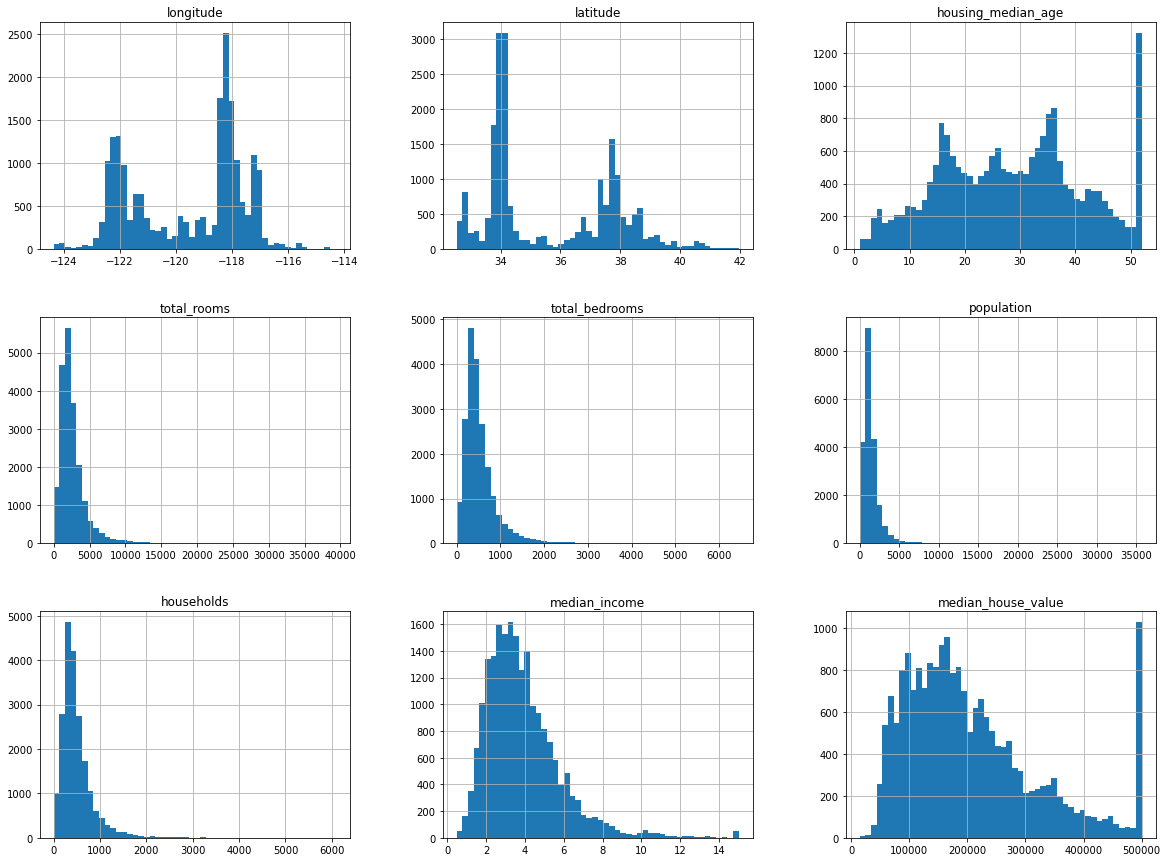

In [8]:
%matplotlib inline     
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

In [ ]:
len(test_set)


In [ ]:
from sklearn.model_selection import train_test_split  

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])


In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualize los datos para encontrar patrones 

In [ ]:
housing = strat_train_set.copy()


### Visualización de datos geográficos 

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude") 

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

### Buscando correlaciones 

In [ ]:
corr_matrix = housing.corr()


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

plt.show() 

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)


## Experimenting with Attribute Combinations

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

¡Hecho! Ahora tiene un modelo de regresión lineal en funcionamiento.

Probémoslo en algunas instancias del conjunto de entrenamiento:

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

In [ ]:
print("Labels:", list(some_labels))

Funciona, aunque las predicciones no son exactamente precisas (por ejemplo, ¡la primera predicción está desfasada cerca de un 40%!).

Midamos el RMSE de este modelo de regresión en todo el conjunto de entrenamiento usando la función `mean_squared_error()` de Scikit-Learn:

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


Esto es mejor que nada, pero claramente no es una gran puntuación: los valores median_housing_values de la mayoría de los distritos oscilan entre $ 120,000 y $ 265,000, por lo que un error de predicción típico de $ 68,628 no es muy satisfactorio.

Este es un ejemplo de un modelo que no se ajusta a los datos de entrenamiento. Cuando esto sucede, puede significar que las características no brindan suficiente información para hacer buenas predicciones o que el modelo no es lo suficientemente poderoso.

Como vimos en el capítulo anterior, las principales formas de solucionar el desajuste es:  

* seleccionar un modelo más potente, 
* alimentar el algoritmo de entrenamiento con mejores características o 
* reducir las limitaciones del modelo.

Este modelo no está regularizado, lo que descarta la última opción. Podría intentar agregar más funciones (p. Ej., El registro de la población), pero primero intentemos un modelo más complejo para ver
cómo lo hace.

Entrenemos a un `DecisionTreeRegressor`.

Este es un modelo poderoso, capaz de encontrar relaciones complejas no lineales en los datos (los árboles de decisión se presentan con más detalle en el Capítulo 6).

El código debería parecer familiar a estas alturas:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


Ahora que el modelo está entrenado, evaluémoslo en el conjunto de entrenamiento:

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


¿¡Esperar lo!? 

¿Ningún error en absoluto?

¿Podría este modelo ser absolutamente perfecto?

Por supuesto, es mucho más probable que el modelo se haya ajustado demasiado a los datos.

¿Como puedes estar seguro?

Como vimos anteriormente, no desea tocar el conjunto de prueba hasta que esté listo para lanzar un modelo en el que esté seguro, por lo que debe usar parte del conjunto de entrenamiento para el entrenamiento y parte de él para la validación del modelo.

## Mejor evaluación mediante validación cruzada

Mejor evaluación mediante validación cruzada

Una forma de evaluar el modelo de árbol de decisión sería usar la función `train_test_split()` para dividir el conjunto de entrenamiento en un conjunto de entrenamiento más pequeño y un conjunto de validación, luego entrenar sus modelos con el conjunto de entrenamiento más pequeño y evaluarlos con el conjunto de validación.

Es un poco de trabajo, pero nada demasiado difícil, y funcionaría bastante bien.

Una gran alternativa es utilizar la función de validación cruzada K-fold de Scikit-Learn.

El siguiente código divide aleatoriamente el conjunto de entrenamiento en 10 subconjuntos distintos llamados pliegues, luego entrena y evalúa el modelo del árbol de decisión 10 veces, seleccionando un pliegue diferente para evaluarlo cada vez y entrenando en los otros 9 pliegues.

El resultado es una matriz que contiene las 10 puntuaciones de evaluación:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


## ADVERTENCIA  

Las características de validación cruzada de Scikit-Learn esperan una función de utilidad (mayor es mejor) en lugar de una función de costo (menor es mejor), por lo que la función de puntuación es en realidad opuesta a la MSE (es decir, un valor negativo), por lo que la el código anterior calcula - `scores` antes de calcular la raíz cuadrada.

Veamos los resultados:

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Ahora, el árbol de decisiones no se ve tan bien como antes.

De hecho, parece funcionar peor que el modelo de regresión lineal.

Tenga en cuenta que la validación cruzada le permite obtener no solo una estimación del rendimiento de su modelo, sino también una medida de la precisión de esta estimación (es decir, su desviación estándar).

El árbol de decisiones tiene una puntuación de aproximadamente 71.407, generalmente ± 2.439.


No tendría esta información si solo usara un conjunto de validación.

Pero la validación cruzada tiene el costo de entrenar el modelo varias veces, por lo que no siempre es posible.

Calculemos las mismas puntuaciones para el modelo de regresión lineal solo para estar seguros:

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Así es: el modelo de árbol de decisión se sobreajusta tan mal que funciona peor que el modelo de regresión lineal.

Probemos ahora un último modelo: `RandomForestRegressor`. 

Como veremos en el capítulo 7, los bosques aleatorios funcionan entrenando muchos árboles de decisión en subconjuntos aleatorios de las características y luego promediando sus predicciones.

La construcción de un modelo sobre muchos otros modelos se llama Ensemble Learning y, a menudo, es una excelente manera de impulsar los algoritmos ML aún más.

Omitiremos la mayor parte del código, ya que es esencialmente el mismo que para los otros modelos:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
 [...]
forest_rmse

In [ ]:
display_scores(forest_rmse_scores)

Vaya, esto es mucho mejor: los bosques aleatorios parecen muy prometedores. 

Sin embargo, tenga en cuenta que la puntuación en el conjunto de entrenamiento sigue siendo mucho más baja que en los conjuntos de validación, lo que significa que el modelo todavía está sobreajustando el conjunto de entrenamiento.

Las posibles soluciones para el sobreajuste son simplificar el modelo, restringirlo (es decir, regularizarlo) u obtener muchos más datos de entrenamiento.

Antes de sumergirse mucho más en los bosques aleatorios, sin embargo, debe probar muchos otros modelos de varias categorías de algoritmos de aprendizaje automático (por ejemplo, varias máquinas de vectores de soporte con diferentes núcleos y posiblemente una red neuronal), sin perder demasiado tiempo ajustando los hiperparámetros.

El objetivo es preseleccionar algunos modelos prometedores (de dos a cinco).

### Sugerencias

Debe guardar todos los modelos con los que experimenta para poder volver fácilmente a cualquier modelo que desee.

Asegúrese de guardar tanto los hiperparámetros como los parámetros entrenados, así como las puntuaciones de validación cruzada y quizás también las predicciones reales.

Esto le permitirá comparar fácilmente las puntuaciones entre los tipos de modelos y comparar los tipos de errores que cometen.

Puede guardar fácilmente modelos de Scikit-Learn usando el módulo pickle de Python o usando la biblioteca joblib, que es más eficiente para serializar arreglos grandes de NumPy (puede instalar este biblioteca usando pip):

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

## Ajuste su modelo

Supongamos que ahora tiene una lista corta de modelos prometedores.

Ahora necesita ajustarlos. Veamos algunas formas en las que puede hacerlo.

### Búsqueda de cuadrícula (Grid Search)

Una opción sería jugar con los hiperparámetros manualmente, hasta que encuentre una gran combinación de valores de hiperparámetros.

Este sería un trabajo muy tedioso y es posible que no tenga tiempo para explorar muchas combinaciones.

En su lugar, debe obtener GridSearchCV de Scikit-Learn para que lo busque.

Todo lo que necesita hacer es decirle con qué hiperparámetros desea que experimente y qué valores probar, y utilizará la validación cruzada para evaluar todas las combinaciones posibles de valores de hiperparámetros.

Por ejemplo, el siguiente código busca la mejor combinación de valores de hiperparámetros para RandomForestRegressor:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
              ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                                                        scoring='neg_mean_squared_error',
                                                        return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)